# Clustering Neighborhoods in Vancouver

The project involves building a code to create a data frame of the Vancouver, British Colombia boroughs and their corresponding neighborhoods. Additionally, the researcher analyses benchmark housing prices to evaluate the relative affluence of the neighborhoods and explore which venue types are most common in each part of the city of Vancouver and its neighborhoods. 

The K-Means approach is applied as a primary clustering tool. The obtained clustering results are visualized, using the Folium Library.

## Primary goals of the project:

- Create the dataframe
- Explore and cluster the neighborhoods in Vancouver

## Dataframe Creation

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


!pip install beautifulsoup4
!pip install lxml
import random # library for random number generation

from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np
     
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')
 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

The next step is to import the Vancouver boroughs, neighborhoods, geographical coordinates, and estimated benchmark housing prices from the oreprocessed csv file and create the dataframe:

In [45]:
import pandas as pd
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1H-NHryfnKBU1J9c30hCNWGAP6hZEVJcn/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head(30))

# the total number of the official Vancouver neighborhoods is 22. The North Vancouver is included in the analysis as well.

               Borough             Neighbourhood  Latitude  Longitude  \
0            West Side             Arbutus Ridge   49.2536  -123.1604   
1   Downtown Vancouver                  Downtown   49.2820  -123.1171   
2                 West         Dunbar-Southlands   49.2500  -123.1852   
3            West Side                 Fairview    49.2635  -123.1313   
4                 East        Grandview-Woodland   49.2767  -123.0695   
5                 East          Hastings-Sunrise   49.2811  -123.0441   
6                 East  Kensington-Cedar Cottage   49.2501  -123.0761   
7                 West                Kerrisdale   49.2341  -123.1554   
8                 East                Killarney    49.2202  -123.0413   
9            West Side                Kitsilano    49.2684  -123.1683   
10               South                  Marpole    49.2107  -123.1302   
11  Downtown Vancouver            Mount Pleasant   49.2628  -123.0995   
12               South                 Oakridge    

 The total number of the official Vancouver neighborhoods is 22. The North Vancouver is included in the analysis as well.

This concludes the dataframe creation task of this project.

## Exploration and clustering of the neighborhoods in Vancouver.

In [46]:
dfs.shape

(23, 5)

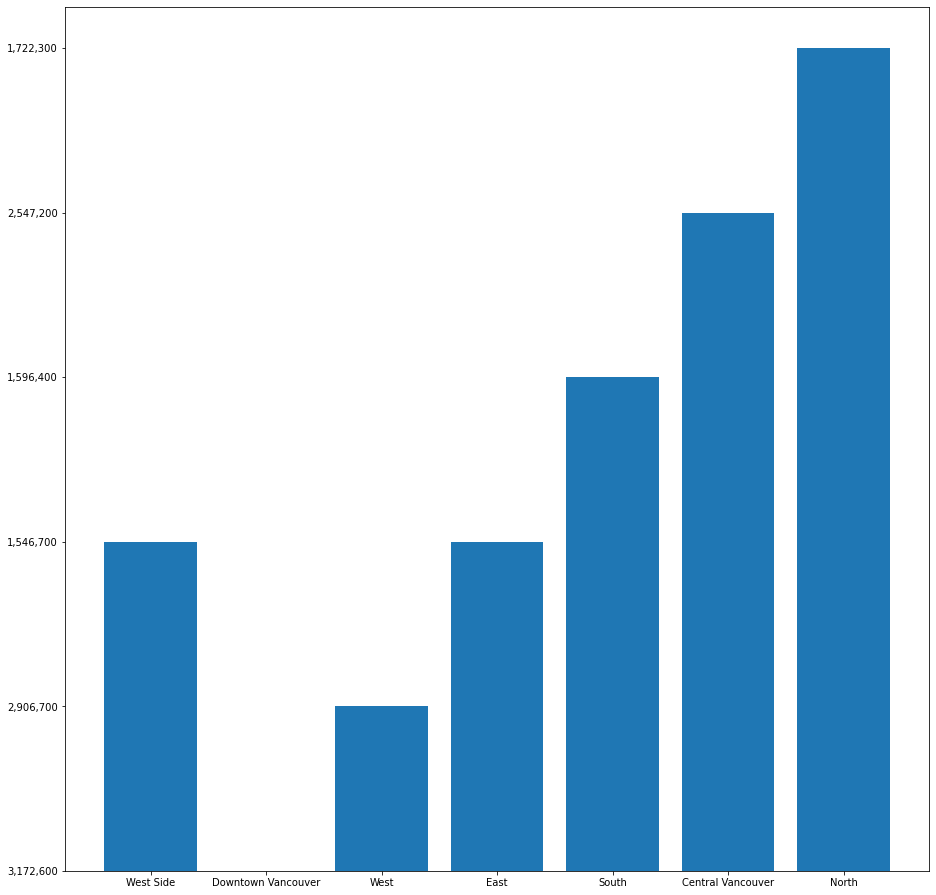

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,3])
ax.bar(dfs['Borough'],dfs['House Price'])
plt.show()

In [50]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(dfs['Borough'].unique()),
        dfs.shape[0]
    )
)

The dataframe has 7 boroughs and 23 neighborhoods.


In [51]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the city of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the city of Vancouver are 49.2608724, -123.1139529.


#### Creating a map of Vancouver with neighborhoods superimposed on top.

In [52]:
# create map using latitude and longitude values
map_v = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(dfs['Latitude'], dfs['Longitude'], dfs['Borough'], dfs['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_v)  
    
map_v

Utilizing the Foursquare API to explore the neighborhoods and segmenting them.

In [53]:
CLIENT_ID = 'N1J3G1FIWCMRDMP4NLUAX4DNHT45IOXFV1VJGGRDEPQORRWO' # your Foursquare ID
CLIENT_SECRET = 'LYQQSR4D5OUQVEZ5EMGFZBWLQXHFOYOJUON3QWFOGKCD44P3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N1J3G1FIWCMRDMP4NLUAX4DNHT45IOXFV1VJGGRDEPQORRWO
CLIENT_SECRET:LYQQSR4D5OUQVEZ5EMGFZBWLQXHFOYOJUON3QWFOGKCD44P3


In [54]:
dfs.loc[:, 'Neighbourhood']

0                Arbutus Ridge
1                     Downtown
2            Dunbar-Southlands
3                    Fairview 
4           Grandview-Woodland
5             Hastings-Sunrise
6     Kensington-Cedar Cottage
7                   Kerrisdale
8                   Killarney 
9                   Kitsilano 
10                    Marpole 
11              Mount Pleasant
12                   Oakridge 
13         Renfrew-Collingwood
14                  Riley Park
15                 Shaughnessy
16                South Cambie
17                 Strathcona 
18                      Sunset
19         Victoria-Fraserview
20                    West End
21             West Point Grey
22             North Vancouver
Name: Neighbourhood, dtype: object

In [64]:
dfs.loc[1, 'Neighbourhood']

'Downtown'

The first two neighbourhoods are Arbutus Ridge and Downtown. However, I would like to explore different boroughs.

In [62]:
neighborhood_latitude = dfs.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dfs.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = dfs.loc[1, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Downtown are 49.282, -123.1171.


Getting the top 100 venues that are in Downtown within a radius of 500 meters.

In [63]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=N1J3G1FIWCMRDMP4NLUAX4DNHT45IOXFV1VJGGRDEPQORRWO&client_secret=LYQQSR4D5OUQVEZ5EMGFZBWLQXHFOYOJUON3QWFOGKCD44P3&v=20180605&ll=49.282,-123.1171&radius=500&limit=100'

In [44]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6020675ecf264901adafeea6'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 49.3245000045, 'lng': 123.07929071814229},
   'sw': {'lat': 49.3154999955, 'lng': 123.06550928185771}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

In [65]:
neighborhood_latitude = dfs.loc[14, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dfs.loc[14, 'Longitude'] # neighborhood longitude value

neighborhood_name = dfs.loc[14, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Riley Park are 49.2405, -123.1015.


In [66]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=N1J3G1FIWCMRDMP4NLUAX4DNHT45IOXFV1VJGGRDEPQORRWO&client_secret=LYQQSR4D5OUQVEZ5EMGFZBWLQXHFOYOJUON3QWFOGKCD44P3&v=20180605&ll=49.2405,-123.1015&radius=500&limit=100'

In [44]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6020675ecf264901adafeea6'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 49.3245000045, 'lng': 123.07929071814229},
   'sw': {'lat': 49.3154999955, 'lng': 123.06550928185771}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

In [127]:
# Going by coordinates for the neighbohoods does not return a result
# I shall try the coordinates of the entire city, i.e. Vancouver, BC 

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    49.2608724, 
    -123.1139529, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=N1J3G1FIWCMRDMP4NLUAX4DNHT45IOXFV1VJGGRDEPQORRWO&client_secret=LYQQSR4D5OUQVEZ5EMGFZBWLQXHFOYOJUON3QWFOGKCD44P3&v=20180605&ll=49.2608724,-123.1139529&radius=500&limit=100'

In [68]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60206bf7348f4025ed626e39'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mt. Pleasant',
  'headerFullLocation': 'Mt. Pleasant, Vancouver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 75,
  'suggestedBounds': {'ne': {'lat': 49.2653724045, 'lng': -123.10707044144183},
   'sw': {'lat': 49.256372395499994, 'lng': -123.12083535855817}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52ae4f3c11d227ba4f4b055a',
       'name': 'Indian Roti Kitchen',
       'location': {'address': '2961 Cambie St',
        'lat': 49.25894973078272,
        'lng': -123.11508745625326,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [69]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [71]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Indian Roti Kitchen,Indian Restaurant,49.258950,-123.115087
1,Moii Cafe,Café,49.262679,-123.114812
2,La Taqueria Pinche Taco Shop,Taco Place,49.263534,-123.112795
3,Marulilu Cafe,Japanese Restaurant,49.263338,-123.114118
4,Body Energy Club,Food,49.261007,-123.117038
5,Whole Foods Market,Grocery Store,49.264018,-123.115303
6,Peaceful Restaurant 和平饭店,Chinese Restaurant,49.263086,-123.115808
7,Aperture Coffee Bar,Coffee Shop,49.263252,-123.110438
8,Yuk Yuk's Comedy Club,Comedy Club,49.260045,-123.114998
9,Hokkaido Ramen Santouka,Ramen Restaurant,49.263243,-123.116649


 How many venues were returned by Foursquare:

In [72]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

75 venues were returned by Foursquare.


## Explore Neighborhoods in Vancouver, BC

In [73]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [74]:
t_venues = getNearbyVenues(names=dfs['Neighbourhood'],
                                   latitudes=dfs['Latitude'],
                                   longitudes=dfs['Longitude']
                                  )

Arbutus Ridge
Downtown
Dunbar-Southlands
Fairview 
Grandview-Woodland
Hastings-Sunrise
Kensington-Cedar Cottage
Kerrisdale
Killarney 
Kitsilano 
Marpole 
Mount Pleasant
Oakridge 
Renfrew-Collingwood
Riley Park
Shaughnessy
South Cambie
Strathcona 
Sunset
Victoria-Fraserview
West End
West Point Grey
North Vancouver


In [75]:
print(t_venues.shape)
t_venues.head(15)

(622, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus Ridge,49.2536,-123.1604,Wakwak Burger,49.252430,-123.159954,Food Truck
1,Downtown,49.2820,-123.1171,Gotham Steakhouse & Cocktail Bar,49.282830,-123.115865,Steakhouse
2,Downtown,49.2820,-123.1171,Rosewood Hotel Georgia,49.283429,-123.118911,Hotel
3,Downtown,49.2820,-123.1171,L'Hermitage,49.280139,-123.117480,Hotel
4,Downtown,49.2820,-123.1171,Disney store,49.281689,-123.119850,Toy / Game Store
5,Downtown,49.2820,-123.1171,Abercrombie & Fitch,49.282274,-123.118685,Clothing Store
6,Downtown,49.2820,-123.1171,The Keg Steakhouse + Bar - Dunsmuir,49.283438,-123.116363,Restaurant
7,Downtown,49.2820,-123.1171,Medina Café,49.280565,-123.116859,Breakfast Spot
8,Downtown,49.2820,-123.1171,Hawksworth Restaurant,49.283362,-123.119462,Lounge
9,Downtown,49.2820,-123.1171,SEPHORA,49.284092,-123.117204,Cosmetics Shop


In [76]:
t_venues.groupby('Neighbourhood').count()
# how many venues were returned for each neighborhood

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Arbutus Ridge,1,1,1,1,1,1
Downtown,87,87,87,87,87,87
Dunbar-Southlands,14,14,14,14,14,14
Fairview,23,23,23,23,23,23
Grandview-Woodland,46,46,46,46,46,46
Hastings-Sunrise,26,26,26,26,26,26
Kensington-Cedar Cottage,27,27,27,27,27,27
Kerrisdale,37,37,37,37,37,37
Killarney,21,21,21,21,21,21


In [77]:
# how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(t_venues['Venue Category'].unique())))

There are 163 uniques categories.


## Analyze Each Neighborhood

In [79]:
# one hot encoding
t_onehot = pd.get_dummies(t_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
t_onehot['Neighbourhood'] = t_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

#t_onehot.head(20)

In [80]:
t_onehot.shape

(622, 164)

In [81]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
t_grouped = t_onehot.groupby('Neighbourhood').mean().reset_index()
t_grouped

,Neighbourhood,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beer Bar,Beer Garden,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Hobby Shop,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Insurance Office,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Motorcycle Shop,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,Arbutus Ridge,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000
1,Downtown,0.00,0.011494,0.011494,0.011494,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,0.011494

In [82]:
t_grouped.shape

(23, 164)

In [83]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in t_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = t_grouped[t_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
                venue  freq
0          Food Truck   1.0
1  African Restaurant   0.0
2              Museum   0.0
3         Music Store   0.0
4         Music Venue   0.0


----Downtown----
            venue  freq
0           Hotel  0.09
1      Restaurant  0.06
2  Clothing Store  0.05
3             Bar  0.03
4     Coffee Shop  0.03


----Dunbar-Southlands----
              venue  freq
0              Bank  0.14
1            Bakery  0.07
2  Sushi Restaurant  0.07
3     Grocery Store  0.07
4       Coffee Shop  0.07


----Fairview ----
                 venue  freq
0          Coffee Shop  0.13
1  Japanese Restaurant  0.09
2     Asian Restaurant  0.09
3                 Park  0.09
4           Restaurant  0.04


----Grandview-Woodland----
               venue  freq
0        Coffee Shop  0.11
1        Pizza Place  0.09
2            Brewery  0.07
3             Bakery  0.04
4  Indian Restaurant  0.04


----Hastings-Sunrise----
                   venue  freq
0  Vietnamese Restau

In [86]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = t_grouped['Neighbourhood']

for ind in np.arange(t_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(t_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Food Truck,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Fair,Event Space,Ethiopian Restaurant
1,Downtown,Hotel,Restaurant,Clothing Store,Café,Bar,Concert Hall,Coffee Shop,Steakhouse,Taco Place,Seafood Restaurant
2,Dunbar-Southlands,Bank,Indian Restaurant,Pub,Sushi Restaurant,Mexican Restaurant,Coffee Shop,Bakery,Grocery Store,Park,Pharmacy
3,Fairview,Coffee Shop,Japanese Restaurant,Asian Restaurant,Park,Pet Store,Camera Store,Breakfast Spot,Salon / Barbershop,Restaurant,Furniture / Home Store
4,Grandview-Woodland,Coffee Shop,Pizza Place,Brewery,Deli / Bodega,Bakery,Vegetarian / Vegan Restaurant,Café,Indian Restaurant,Theater,French Restaurant
5,Hastings-Sunrise,Vietnamese Restaurant,Coffee Shop,Event Space,Burger Joint,Liquor Store,Sushi Restaurant,Pharmacy,Donut Shop,Chinese Restaurant,Sandwich Place
6,Kensington-Cedar Cottage,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Park,Bank,Bus Stop,Seafood Restaurant,Market,Breakfast Spot,Smoke Shop,Deli / Bodega
7,Kerrisdale,Coffee Shop,Chinese Restaurant,Pharmacy,Sushi Restaurant,Bank,Tea Room,Mediterranean Restaurant,Burger Joint,Business Service,Café
8,Killarney,Bus Stop,Chinese Restaurant,Fast Food Restaurant,Bank,Farmers Market,Sandwich Place,Salon / Barbershop,Liquor Store,Sushi Restaurant,Coffee Shop
9,Kitsilano,Coffee Shop,Café,Toy / Game Store,Pub,Indian Restaurant,Park,Restaurant,Japanese Restaurant,Chinese Restaurant,Bubble Tea Shop


Interestingly, dining locations, especially Pizza Place and coffee shops as well as bus stops are the most common venues in the majority of neighbourhoods in the city of Vancouver.

## Clustering Neighborhoods

In [106]:
# run _k_-means to cluster the neighborhood into 5 clusters.
# set number of clusters
#kclusters = 3
k=5

#t_grouped_clustering = t_grouped.drop('Neighbourhood', 1)
#t_grouped_clustering = dfs.drop(['Borough','Neighbourhood', 'House Price'],1)
t_clustering = dfs.drop(['Borough','Neighbourhood','House Price'],1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(t_grouped_clustering)
kmeans = KMeans(n_clusters = k,random_state=0).fit(t_clustering)
kmeans.labels_

# check cluster labels generated for each row in the dataframe
dfs

,Cluster Labels,Borough,Neighbourhood,Latitude,Longitude,House Price
0,2,West Side,Arbutus Ridge,49.2536,-123.1604,"3,172,600"
1,4,Downtown Vancouver,Downtown,49.2820,-123.1171,"3,172,600"
2,2,West,Dunbar-Southlands,49.2500,-123.1852,"2,906,700"
3,4,West Side,Fairview,49.2635,-123.1313,"3,172,600"
4,1,East,Grandview-Woodland,49.2767,-123.0695,"1,546,700"
5,1,East,Hastings-Sunrise,49.2811,-123.0441,"1,546,700"
6,3,East,Kensington-Cedar Cottage,49.2501,-123.0761,"1,546,700"
7,2,West,Kerrisdale,49.2341,-123.1554,"2,906,700"
8,3,East,Killarney,49.2202,-123.0413,"1,546,700"
9,2,West Side,Kitsilano,49.2684,-123.1683,"1,546,700"


The *k-means* algorithms has determined a total of five clusters labeled from 0 to 4.

In [123]:
dfs1 = dfs.drop(['House Price'],1)
dfs1

,Cluster Labels,Borough,Neighbourhood,Latitude,Longitude
0,2,West Side,Arbutus Ridge,49.2536,-123.1604
1,4,Downtown Vancouver,Downtown,49.2820,-123.1171
2,2,West,Dunbar-Southlands,49.2500,-123.1852
3,4,West Side,Fairview,49.2635,-123.1313
4,1,East,Grandview-Woodland,49.2767,-123.0695
5,1,East,Hastings-Sunrise,49.2811,-123.0441
6,3,East,Kensington-Cedar Cottage,49.2501,-123.0761
7,2,West,Kerrisdale,49.2341,-123.1554
8,3,East,Killarney,49.2202,-123.0413
9,2,West Side,Kitsilano,49.2684,-123.1683


## Analyzing Each Neighborhood

In [126]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dfs1['Latitude'], dfs1['Longitude'], dfs1['Neighbourhood'], dfs1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining Clusters

Now, let's examine each cluster based on the discriminating venue categories that define each cluster.


In [112]:
# cluster 1
dfs.loc[dfs['Cluster Labels'] == 0, dfs.columns[[1] + list(range(2, dfs.shape[1]))]]

,Borough,Neighbourhood,Latitude,Longitude,House Price
10,South,Marpole,49.2107,-123.1302,"1,596,400"
12,South,Oakridge,49.2261,-123.1166,"1,596,400"
14,Central Vancouver,Riley Park,49.2405,-123.1015,"2,547,200"
15,Central Vancouver,Shaughnessy,49.2453,-123.1413,"2,547,200"
16,Central Vancouver,South Cambie,49.2452,-123.1208,"2,547,200"


In [114]:
# cluster 2
dfs.loc[dfs['Cluster Labels'] == 1, dfs.columns[[1] + list(range(2, dfs.shape[1]))]]

,Borough,Neighbourhood,Latitude,Longitude,House Price
4,East,Grandview-Woodland,49.2767,-123.0695,"1,546,700"
5,East,Hastings-Sunrise,49.2811,-123.0441,"1,546,700"
22,North,North Vancouver,49.3200,-123.0724,"1,722,300"


In [115]:
# cluster 3
dfs.loc[dfs['Cluster Labels'] == 2, dfs.columns[[1] + list(range(2, dfs.shape[1]))]]

,Borough,Neighbourhood,Latitude,Longitude,House Price
0,West Side,Arbutus Ridge,49.2536,-123.1604,"3,172,600"
2,West,Dunbar-Southlands,49.2500,-123.1852,"2,906,700"
7,West,Kerrisdale,49.2341,-123.1554,"2,906,700"
9,West Side,Kitsilano,49.2684,-123.1683,"1,546,700"
21,West,West Point Grey,49.2610,-123.2001,"2,906,700"


In [117]:
# cluster 4
dfs.loc[dfs['Cluster Labels'] == 3, dfs.columns[[1] + list(range(2, dfs.shape[1]))]]

,Borough,Neighbourhood,Latitude,Longitude,House Price
6,East,Kensington-Cedar Cottage,49.2501,-123.0761,"1,546,700"
8,East,Killarney,49.2202,-123.0413,"1,546,700"
13,East,Renfrew-Collingwood,49.2445,-123.0422,"1,546,700"
18,South,Sunset,49.2180,-123.0660,"1,596,400"
19,South,Victoria-Fraserview,49.2203,-123.0659,"1,596,400"


In [119]:
# cluster 5
dfs.loc[dfs['Cluster Labels'] == 4, dfs.columns[[1] + list(range(2, dfs.shape[1]))]]

,Borough,Neighbourhood,Latitude,Longitude,House Price
1,Downtown Vancouver,Downtown,49.2820,-123.1171,"3,172,600"
3,West Side,Fairview,49.2635,-123.1313,"3,172,600"
11,Downtown Vancouver,Mount Pleasant,49.2628,-123.0995,"3,172,600"
17,Downtown Vancouver,Strathcona,49.2765,-123.0874,"3,172,600"
20,Downtown Vancouver,West End,49.2901,-123.1376,"3,172,600"


The Clustering algorithm has been able to identified clusters closely resembling the boroughs of the city of Vancouver with a relatively small misclassification error. We can notice that even different boroughs classified under the same cluster are actually next to each other.

The majority of the most common venues in the first cluster (South and Central Vancouver) are bus stops, parks, and coffee shops. The second and the smallest cluster (East and North Vancouver) is characterized by a variety of restaurants. The third and the most affluent cluster (West and West Side) include banks, gyms, coffee shops, and restaurants. The fourth cluster (East and South sides of Vancouver) is characterized by Vietnamese and Middle Eastern restaurants, bus stops, metro stations, and parks. The final cluster (Downtown and West Side Vancouver) includes hotels, parks, coffee shops, and Japanese restaurants.
